# **Online Payment Fraudulent Detection Data Pre processing - Mile Stone 1**

# ***Installing boto3 before importing libraries***

In [42]:
!pip install boto3

# ***Importing Libraries***

In [43]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import boto3
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# **Set Up the Environment**

In [44]:
# Setting file paths for input data
RAW_DATA_PATH = "Raw_Dataset_for_Online_Payment.csv"  # Modify the path if necessary

# ***Load the Dataset***

In [45]:
def load_data(path):
    try:
        df = pd.read_csv(path)
        return df
    except FileNotFoundError as error:
        print(f"Error: {error}. Check if the file exists at the given location.")
        raise

df = load_data(RAW_DATA_PATH)

# ***Inspection of initial Dataset Provided***

---
Initial Dataset inspection involves examining the structure, statistical summary, and first few rows to understand the data's characteristics and identify any potential issues

In [46]:
def inspect_data(df):
    print("Dataset Overview:")
    df.info()  # Provides basic structural information
    print("\nStatistical Summary of Numerical Columns:")
    print(df.describe())  # Displays key statistics for numerical data
    print("\nPreview of the First Few Rows:")
    print(df.head())  # Shows the initial rows of the dataset

inspect_data(df)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
 10  isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.4+ MB

Statistical Summary of Numerical Columns:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  16426.000000  1.642600e+04   1.642600e+04    1.642600e+04   
mean     306.441556  8.248655e+05   1.242838e+0

# ***Handling Missing Data***

---
Handling missing data involves identifying and addressing gaps in the dataset to ensure data integrity and improve the accuracy of analyses and models



In [47]:
def manage_missing_values(df):
    missing_summary = df.isnull().sum()
    print("\nSummary of Missing Values:\n", missing_summary)

    # Process missing data
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            median_val = df[column].median()
            df[column] = df[column].fillna(median_val)  # Avoid inplace to prevent warnings
        elif df[column].dtype == 'object':
            mode_val = df[column].mode()[0]
            df[column] = df[column].fillna(mode_val)  # Avoid inplace to prevent warnings
    print("\nMissing Values After Processing:\n", df.isnull().sum())

manage_missing_values(df)


Summary of Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Missing Values After Processing:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


# ***Handling Duplicate Values***

---
The code snippet identifies and removes duplicate rows from a DataFrame, ensuring data integrity and preventing redundancy in the dataset.


In [48]:
def handle_duplicates(dataframe):
    # Display the number of duplicate rows before removal
    duplicate_count = dataframe.duplicated().sum()
    print(f"Number of duplicate rows before removal: {duplicate_count}")

    # Remove duplicate rows
    dataframe.drop_duplicates(inplace=True)

    # Display the number of duplicate rows after removal
    duplicate_count_after = dataframe.duplicated().sum()
    print(f"Number of duplicate rows after removal: {duplicate_count_after}")

# Example usage
handle_duplicates(df)

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0


# ***Visual Representation for Types of Transaction***


---
A visual representation of transaction types provides a clear overview of the distribution and frequency of different transaction categories, helping to identify patterns and trends in the data


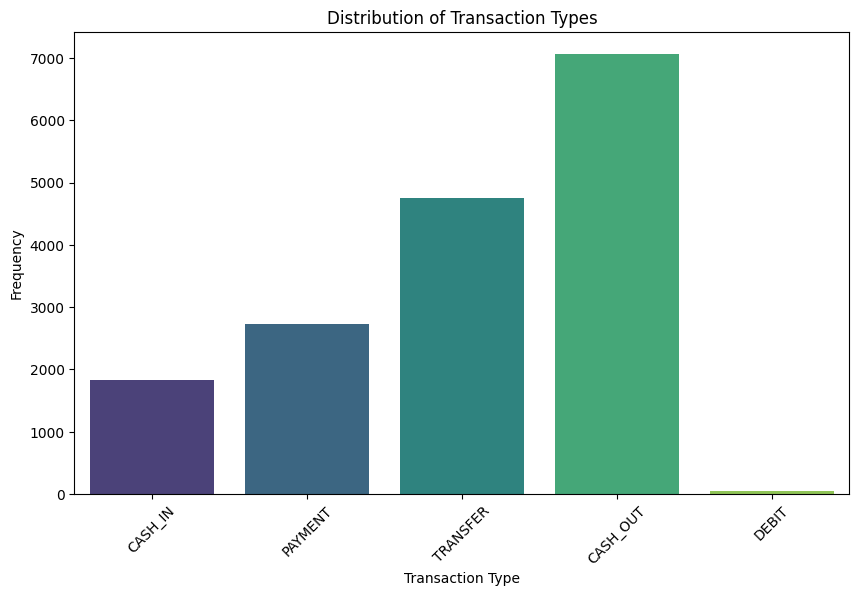

In [49]:
def plot_transaction_types(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='type', hue='type', palette='viridis', legend=False)  # Hue resolves the warning
    plt.title('Distribution of Transaction Types')
    plt.xlabel('Transaction Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

plot_transaction_types(df)

# ***Finding the Correlation using Heatmap***

---
Using a heatmap to find correlations allows for a visual analysis of the relationships between variables, highlighting patterns and strengths of associations within the dataset


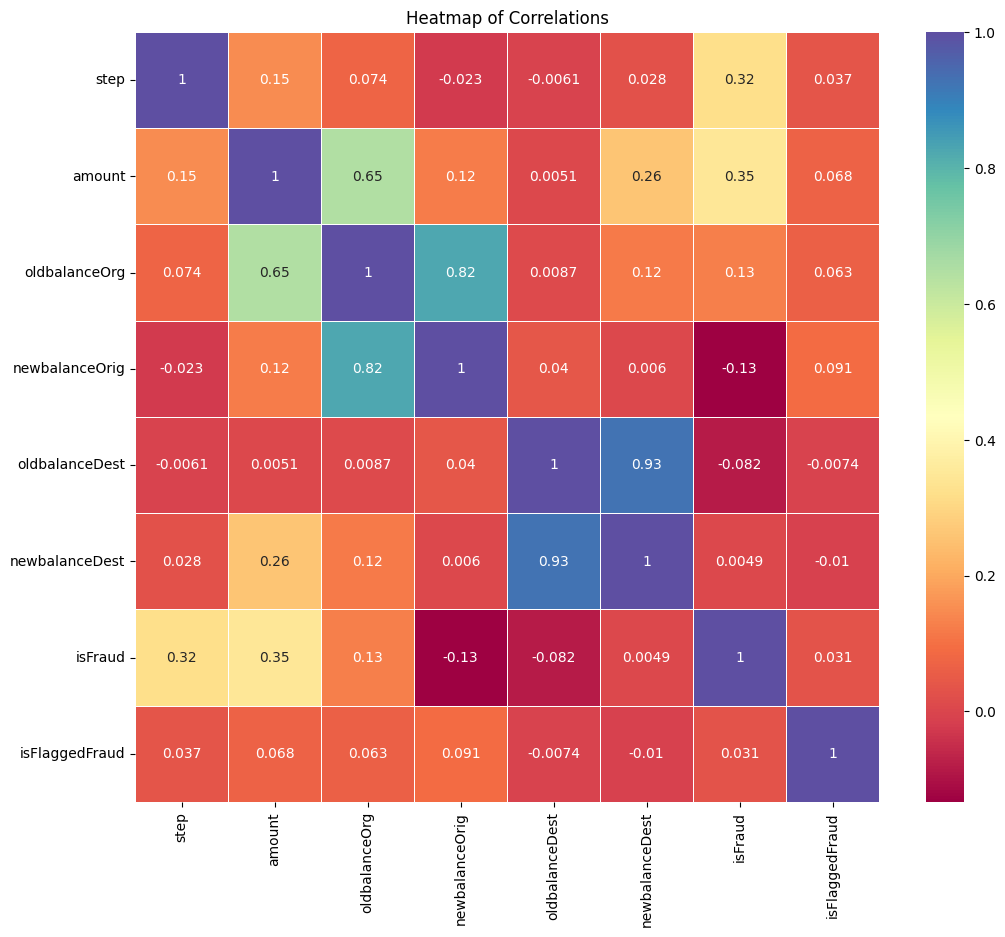

In [50]:
def display_correlation_heatmap(df):
    # Select only the numerical columns
    numeric_data = df.select_dtypes(include=['int64', 'float64'])

    # Set the figure size for the plot
    plt.figure(figsize=(12, 10))

    # Compute the correlation matrix
    correlation_matrix = numeric_data.corr()

    # Generate a heatmap with annotations and a new color scheme
    sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', linewidths=0.5)

    # Add a title to the heatmap
    plt.title('Heatmap of Correlations')

    # Display the plot
    plt.show()

    return correlation_matrix

# Generate and display the heatmap
correlation_matrix = display_correlation_heatmap(df)


# ***Deleting Unnecessary / Redundant Columns***

---
Deleting unnecessary or redundant columns helps streamline the dataset, enhancing its efficiency for analysis by removing irrelevant or duplicate information



In [51]:
def remove_unneeded_columns(df, columns):
    df.drop(columns=columns, inplace=True)
    print("Removed the following columns: ", columns)

columns_to_remove = ['step', 'nameOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']
remove_unneeded_columns(df, columns_to_remove)

Removed the following columns:  ['step', 'nameOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']


# ***Checking if the Dataset is Balanced***

---
Checking if the dataset is balanced involves assessing the distribution of classes within the target variable to identify any significant imbalances that could affect model performance.



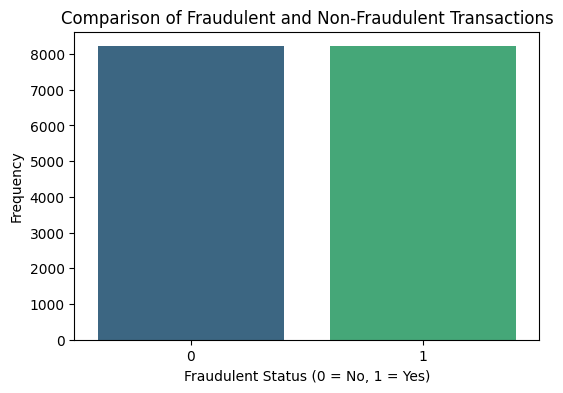


Summary of Fraudulent Transactions:
 isFraud
0    8213
1    8213
Name: count, dtype: int64


In [32]:
def assess_balance(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='isFraud', hue='isFraud', palette='viridis', legend=False)  # Hue used to avoid warning
    plt.title('Comparison of Fraudulent and Non-Fraudulent Transactions')
    plt.xlabel('Fraudulent Status (0 = No, 1 = Yes)')
    plt.ylabel('Frequency')
    plt.show()

    fraud_summary = df['isFraud'].value_counts()
    print("\nSummary of Fraudulent Transactions:\n", fraud_summary)

    if fraud_summary.min() / fraud_summary.max() < 0.1:
        print("Warning: The dataset may be imbalanced. Consider applying resampling methods.")

assess_balance(df)

# ***Convert Categorical Features to Numerical Representations***

---
Converting categorical features to numerical representations is essential for enabling machine learning algorithms to process and analyze the data effectively, as these algorithms typically require numerical input.


In [52]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print("Categorical features converted to numerical format.")

# Map Categorical Name for 'isFraud' Column
df["isFraud"] = df["isFraud"].map({
    0: "No Fraud", 1: "Fraud"
})
print("Updated 'isFraud' column with categorical labels.")

Categorical features converted to numerical format.
Updated 'isFraud' column with categorical labels.


In [53]:
df.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,0,76550.74,1096252.93,1172803.66,No Fraud
1,3,12617.11,339181.87,326564.76,No Fraud
2,4,22877.00,22877.00,0.00,Fraud
3,4,182739.36,182739.36,0.00,Fraud
4,1,4738282.28,4738282.28,0.00,Fraud
5,1,10000000.00,10000000.00,0.00,Fraud
6,4,418896.64,291444.00,0.00,No Fraud
7,1,76582.23,76582.23,0.00,Fraud
8,1,25091.68,1022.00,0.00,No Fraud
9,3,16800.24,140537.00,123736.76,No Fraud


# ***Normalize Numerical Features***

---
Normalizing numerical features adjusts the scales of different variables to a common range, enhancing the performance and convergence of machine learning algorithms by ensuring that no single feature disproportionately influences the model.


In [35]:
def normalize_numerical_features(dataframe, method='minmax'):
    numerical_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns
    if method == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    dataframe[numerical_columns] = scaler.fit_transform(dataframe[numerical_columns])
    print("Numerical features normalized using", method, "scaling.")
    return dataframe

df = normalize_numerical_features(df, method='minmax')

Numerical features normalized using minmax scaling.


In [54]:
df.tail(10)

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
16416,0,7835.15,10130.00,17965.15,No Fraud
16417,3,2317.72,212.00,0.00,No Fraud
16418,3,9181.76,0.00,0.00,No Fraud
16419,1,219110.27,219110.27,0.00,Fraud
16420,4,1653144.10,1653144.10,0.00,Fraud
16421,1,542461.74,0.00,0.00,No Fraud
16422,0,2032.93,7625673.00,7627705.93,No Fraud
16423,4,768520.15,768520.15,0.00,Fraud
16424,4,379057.93,379057.93,0.00,Fraud
16425,0,98932.38,1609496.52,1708428.90,No Fraud


# ***Save Final Preprocessed Dataset***

---
Saving the final preprocessed dataset preserves the cleaned and transformed data for future analysis or modeling, ensuring that the preprocessing steps can be consistently applied and reused.


In [55]:
final_dataset_path = "Final_cleaned_preprocessed_DataSet.csv"
df.to_csv(final_dataset_path, index=False)
print("Final preprocessed dataset saved to: ", final_dataset_path)

Final preprocessed dataset saved to:  Final_cleaned_preprocessed_DataSet.csv


# ***Develop Mechanism to Store & Retrieve Preprocessed Data in AWS S3***

---
Developing a mechanism to store and retrieve preprocessed data in AWS S3 allows for efficient data management and access, leveraging S3's scalable storage solution for easy retrieval and integration with other AWS services.


In [ ]:
session = boto3.Session(
    aws_access_key_id='KEY',
    aws_secret_access_key='KEY',
    region_name='ap-south-1'
)

s3 = session.resource('s3')

bucket_name = 'online-fraud-detection-internship'
bucket = s3.Bucket(bucket_name)

# Upload Final Preprocessed Dataset to S3
s3_file_name = 'Aravind_P_Finalised_Dataset.csv'
try:
    bucket.upload_file(final_dataset_path, s3_file_name)
    print(f'Successfully uploaded {final_dataset_path} to {bucket_name}/{s3_file_name}')
except Exception as e:
    print(f'Error uploading file: {e}')

print(f'Files in bucket {bucket_name}:')
for obj in bucket.objects.all():
    print(obj.key)

Successfully uploaded Final_cleaned_preprocessed_DataSet.csv to online-fraud-detection-internship/Aravind_P_Finalised_Dataset.csv
Files in bucket online-fraud-detection-internship:
Aravind_P_Finalised_Dataset.csv
Asritha_Final_Dataset.csv
Charan_Kasanneni_Final_Dataset.csv
Final_Dataset.csv
Final_cleaned_preprocessed_DataSet.csv
Hariharan_Joga_Final_Dataset.csv
Harsh_Kumar_Final_Dataset.csv
P_BHUVANA_CHANDRA_Final_Dataset.csv
PavanKalyan_Chittala_Final_Dataset.csv
Preprocessed_Online_Payment_Data.csv
Sreya_Boyapati_Final_Dataset.csv
data/CrPC_1973.txt
palle_aditya_preprocessed_data.csv
preprocessed_data.csv


# ***Download File from S3***

---
Downloading a file from S3 enables you to access stored data locally or within your application, facilitating data analysis, processing, or sharing while benefiting from S3's durability and availability features.


In [57]:
download_path = r'C:\Users\prasa\OneDrive\Desktop\infosys_internship\Online-Payments-Fraud-Detection-with-Machine-Learning_oct_2024'
  # Location of download

try:
    bucket.download_file(s3_file_name, download_path)
    print(f'Successfully downloaded {s3_file_name} to {download_path}')
except Exception as e:
    print(f'Error downloading file: {e}')

print(f'Files in bucket {bucket_name}:')
for obj in bucket.objects.all():
    print(obj.key)

Successfully downloaded Aravind_P_Finalised_Dataset.csv to C:\Users\prasa\OneDrive\Desktop\infosys_internship\Online-Payments-Fraud-Detection-with-Machine-Learning_oct_2024
Files in bucket online-fraud-detection-internship:
Aravind_P_Finalised_Dataset.csv
Asritha_Final_Dataset.csv
Charan_Kasanneni_Final_Dataset.csv
Final_Dataset.csv
Final_cleaned_preprocessed_DataSet.csv
Hariharan_Joga_Final_Dataset.csv
Harsh_Kumar_Final_Dataset.csv
P_BHUVANA_CHANDRA_Final_Dataset.csv
PavanKalyan_Chittala_Final_Dataset.csv
Preprocessed_Online_Payment_Data.csv
Sreya_Boyapati_Final_Dataset.csv
data/CrPC_1973.txt
palle_aditya_preprocessed_data.csv
preprocessed_data.csv
